In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 572s 50us/step


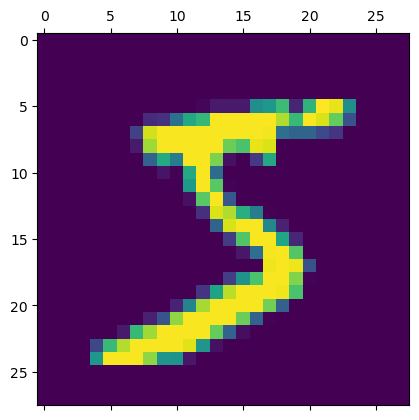

In [5]:
plt.matshow(X_train[0])

In [6]:
print(y_train[0])

5


In [31]:
X_train=X_train/255
x_test=x_test/255
print(len(X_train))
X_train.shape

60000


(60000, 784)

In [32]:
X_train_flat=X_train.reshape(len(X_train),28*28)
print(X_train_flat.shape)
x_test_flat=x_test.reshape(len(x_test),28*28)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [33]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [58]:
model=Sequential()
model.add(Dense(150,input_shape=(784,),activation="relu"))
model.add(Dense(10,activation="sigmoid"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [61]:
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9956


In [62]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9780


[0.0828656256198883, 0.9779999852180481]

In [63]:
y_predict=model.predict(x_test_flat)
y_pred_labels=[np.argmax(i) for i in y_predict]

313/313 [==============================] - 1s 2ms/step


In [64]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
print(cm)

tf.Tensor(
[[ 970    0    1    1    2    0    2    2    2    0]
 [   0 1124    2    1    0    3    2    1    2    0]
 [   6    0 1012    2    0    0    1    5    4    2]
 [   0    0    3  989    0    3    0    7    0    8]
 [   3    0    4    1  953    1    3    3    0   14]
 [   2    0    0   13    1  870    3    1    1    1]
 [   4    3    3    1    4    8  935    0    0    0]
 [   1    3   11    3    0    0    0 1007    1    2]
 [   3    0    8    6    5    5    2    4  938    3]
 [   1    2    0    6    6    2    0    9    1  982]], shape=(10, 10), dtype=int32)


Text(50.722222222222214, 0.5, 'Truth')

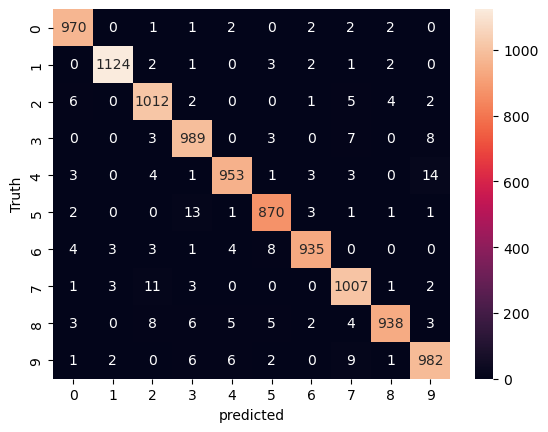

In [65]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")